In [1]:
# This script calculate the confusion table and associated LST, ET and albedo
# and save it in a netcdf file

import numpy as np
import rasterio
import fiona
import pandas as pd
import xarray as xr
from rasterio import features
from rasterio.mask import mask
import dask
from dask.diagnostics import ProgressBar
from xarray.core.duck_array_ops import count


def mymask(tif, shp):
    # To mask landsat LUC pixels included in each MODIS pixel
    out_image, out_transform = rasterio.mask.mask(tif,
                                                  shp,
                                                  all_touched=False,
                                                  crop=True)
    # out_meta = tif.meta
    # return out_image,out_meta,out_transform
    return out_image, out_transform


def confusionmatrix(actual, predicted, unique, imap):
    """
    Generate a confusion matrix for multiple classification
    @params:
        actual      - a list of integers or strings for known classes
        predicted   - a list of integers or strings for predicted classes
        # normalize   - optional boolean for matrix normalization
        unique		- is the unique numbers assigned to each class
        imap		- mapping of classes 

    @return:
        matrix      - a 2-dimensional list of pairwise counts
    """

    matrix = [[0 for _ in unique] for _ in unique]
    # Generate Confusion Matrix
    for p, a in list(zip(actual, predicted)):
        if ((p > len(unique)) or (a > len(unique))):
            continue
        matrix[imap[p]][imap[a]] += 1
    # Matrix Normalization
    # if normalize:
    sigma = sum([sum(matrix[imap[i]]) for i in unique])
    matrix_normalized = [
        row for row in map(lambda i: list(map(lambda j: j / sigma, i)), matrix)
    ]
    return matrix, matrix_normalized


NUMBER_OF_CLASSES = 10  #[DF,DF,shrub,herb,sparse,wetland, water]
class_names = [
    "EF", "DF", "Shrub", "Herb", "Sparse", "Barren", "Fen", "Bog", "SL",
    "water"
]
conversion_type = []
for i in range(0, NUMBER_OF_CLASSES):
    for j in range(0, NUMBER_OF_CLASSES):
        # if (i==j):
        # 	continue
        tmp = class_names[i] + "_" + class_names[j]
        conversion_type.append(tmp)

in_dir = "/data/ABOVE/Final_data/"
out_dir = ("/data/home/hamiddashti/mnt/nasa_above/working/modis_analyses/test/")

luc2003 = rasterio.open(in_dir + 'LUC/geographic/LUC_10/mosaic_reproject_2003.tif')
luc2013 = rasterio.open(in_dir + 'LUC/geographic/LUC_10/mosaic_reproject_2013.tif')

changed_pixels_mask = xr.open_dataarray(
    '/data/home/hamiddashti/nasa_above/outputs/Natural_Variability/'
    'Natural_Variability_Annual_outputs/geographic/changed_pixels.nc')
    

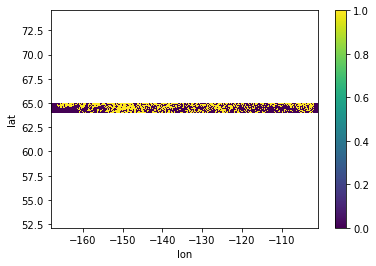

In [2]:
changed_pixels_mask.where((changed_pixels_mask.lat>64)&(changed_pixels_mask.lat<65)).plot()